In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
# 1. Data Collection
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [12]:
# 2.For Data Exploration and Cleaning
def clean_data(data):
    """Exploring the dataset and handle missing data."""
    return data

In [13]:
# 3.For Descriptive Statistics
def calculate_statistics(data):
    # Calculating key metrics such as average purchase value, frequency of purchases, etc.
    statistics = {
        'mean_purchase_value': data['MntTotal'].mean(),
        'purchase_frequency': data.shape[0] / data['Customer_Days'].max()
    }
    return statistics

In [14]:
# 4.For Customer Segmentation
def perform_segmentation(data, num_clusters):
    """To Perform customer segmentation using K-means clustering."""
    features = data[['MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']]
    standardized_features = (features - features.mean()) / features.std()

    # Performing K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(standardized_features)
    return data

In [15]:
# 5. Visualization Part
def visualize_segments(data):
    """Creating visualizations"""
    # Histogram of Total Purchase Amount
    plt.figure(figsize=(10, 6))
    sns.histplot(data['MntTotal'], bins=20, kde=True)
    plt.title('Distribution of Total Purchase Amount')
    plt.xlabel('Total Purchase Amount')
    plt.ylabel('Frequency')
    plt.show()

    #For Box plot of Total Purchase Amount by Cluster
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='MntTotal', data=data)
    plt.title('Total Purchase Amount by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Purchase Amount')
    plt.show()

    #For Heatmap of correlations between features
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[['MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
    sns.pairplot(data[['MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Cluster']], hue='Cluster', palette='viridis')
    plt.show()

In [7]:
# 6.For Insights and Recommendations
def analyze_segments(data):
    """Analyzing characteristics of each segment and provide insights."""
    segment_counts = data['Cluster'].value_counts()
    segment_means = data.groupby('Cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


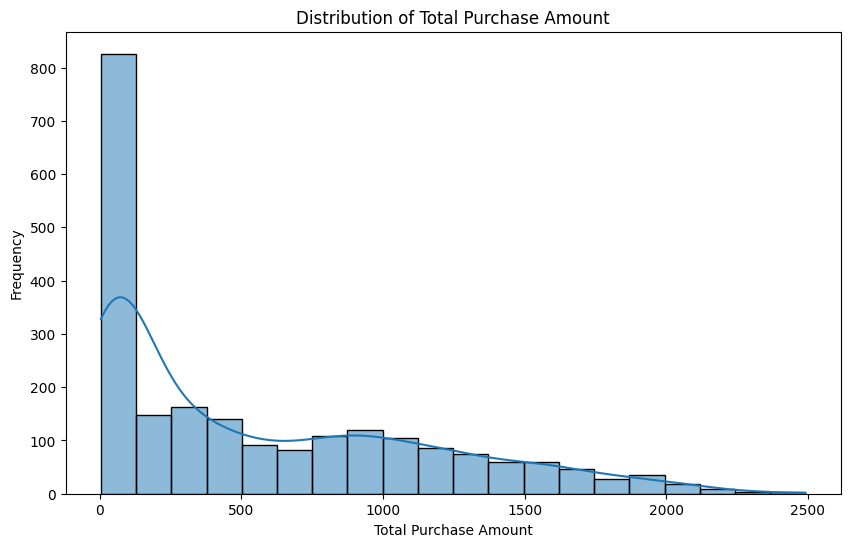

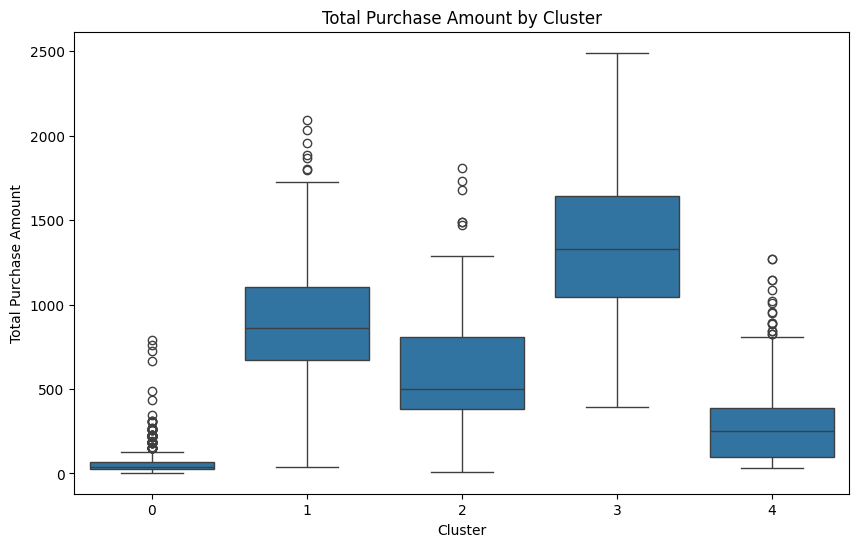

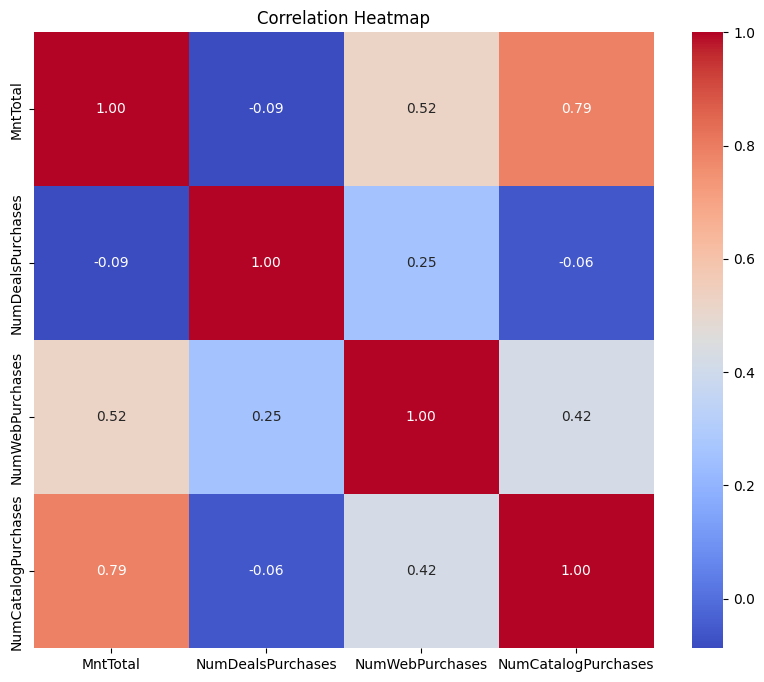

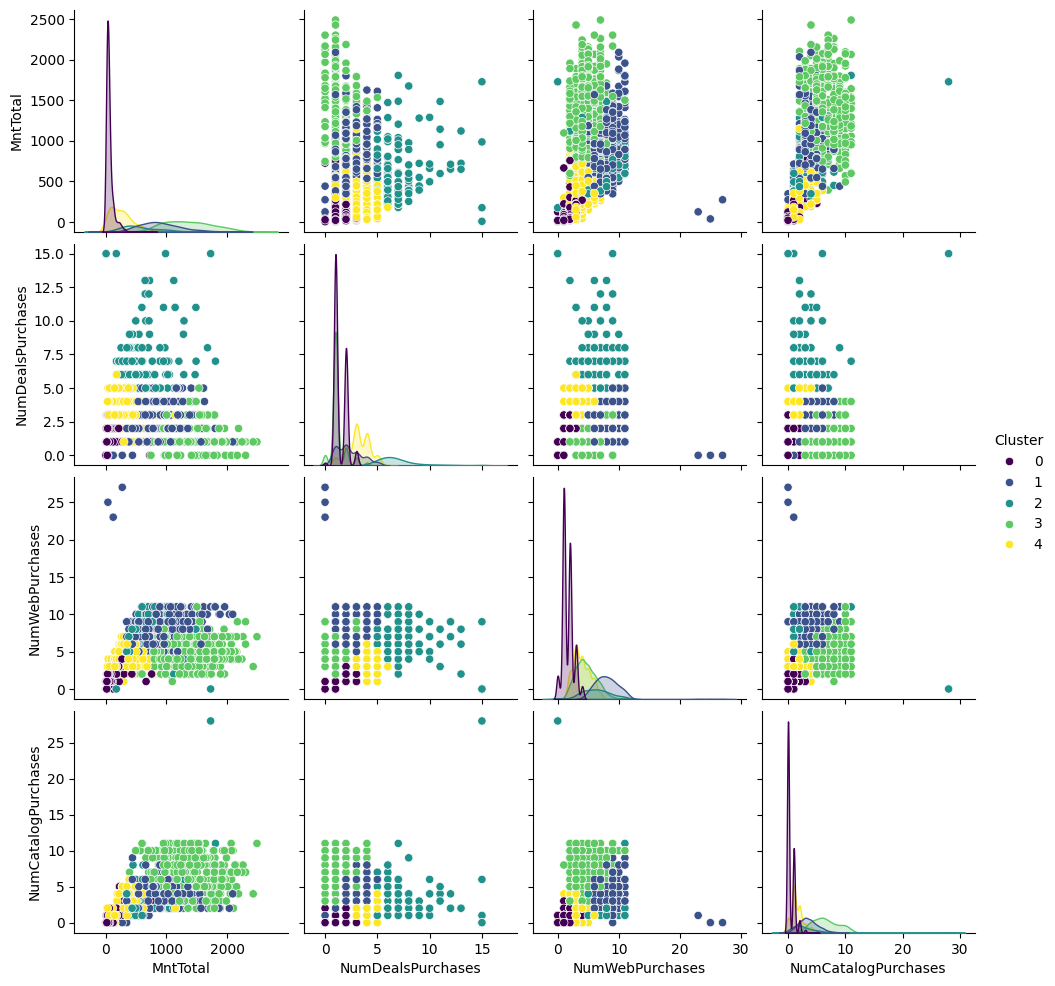

In [9]:
# Main function
def main():
    file_path = '/content/ifood_df.csv'
    data = load_data(file_path)

    # Data Exploration and Cleaning
    cleaned_data = clean_data(data)

    # Descriptive Statistics
    statistics = calculate_statistics(cleaned_data)

    # Customer Segmentation
    num_clusters = 5
    segmented_data = perform_segmentation(cleaned_data, num_clusters)

    # Visualization
    visualize_segments(segmented_data)

    # Insights and Recommendations
    analyze_segments(segmented_data)

if __name__ == "__main__":
    main()
